#  Q1) Perform required Logistic Regression from scratch on Dataset 1. Compare the F1 score of the LR model built from scratch and built using python library.

#Implementing Logistic Regression from scratch

In [ ]:
import pandas as pd
import numpy as np

# Making a synthetic Dataset

In [ ]:
from sklearn.datasets import make_classification
X , y = make_classification(n_features = 4,n_classes=2,n_samples=100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Standardizing Values

In [ ]:
def standardize(X):
    for i in range(X.shape[1]):
        X[:,i] = (X[:,i] - np.mean(X[:,i]))/np.std(X[:,i])

In [ ]:
standardize(X_train)
standardize(X_test)

In [ ]:
def sigmoid(k):
  return 1/(1+np.exp(-k))

In [ ]:
def cost_function(X, y, theta):
  m = len(y)
  h = sigmoid(X.dot(theta))
  y_pred = X.dot(theta)
  cost = -(1/m)*np.sum(y*np.log(h)+ (1-y)*np.log(1-h))
  return cost

In [ ]:
def gradient_descent(X , y, theta, alpha, iterations):
  m = len(y)
  costs = []
  for i in range(iterations):
    y_pred = sigmoid(X.dot(theta))
    error = np.dot(X.transpose() , (y_pred - y))
    theta -= alpha * 1/m * error
    costs.append(cost_function(X, y, theta))
    return theta, costs

In [ ]:
theta = np.zeros(X.shape[1])

In [ ]:
theta , costs = gradient_descent( X_train , y_train, theta, alpha = 0.01, iterations=500)

In [ ]:
def predict_function(X):
  y_pred = sigmoid(np.dot(X,theta))
  for i in range(len(y_pred)):
    if y_pred[i] > 0.5:
      y_pred[i] = 1
    else:
      y_pred[i] = 0
  return y_pred

In [ ]:
y_pred = predict_function(X_test)
y_pred

array([0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0.])

In [ ]:
from sklearn.metrics import f1_score
print("F1 score of Logistic Regression using Scratch code: ",f1_score(y_pred, y_test))

F1 score of Logistic Regression using Scratch code:  0.761904761904762


In [ ]:
from sklearn.datasets import make_classification
X , y = make_classification(n_features = 4,n_classes=2,n_samples=100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state = 21, multi_class ='auto')
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
from sklearn.metrics import f1_score
print("F1 score of Logistic Regression using Libraries: ",f1_score(y_pred, y_test))

F1 score of Logistic Regression using Libraries:  0.9166666666666666


#Q2) Perform Multimodal classification on Dataset 2 using python library.

#Using Libraires to execute Logistic Regression

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state = 0, multi_class ='auto')
lr.fit(X_train_std,y_train)
y_pred = lr.predict(X_test_std)
print(accuracy_score(y_test,y_pred))

0.9666666666666667


<ipython-input-19-3e3502295bc1>:43: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


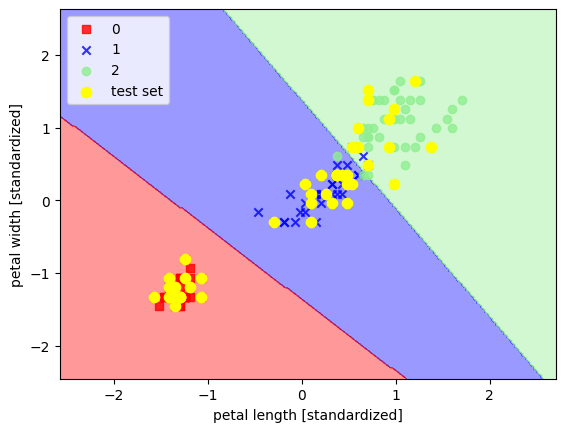

In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='Yellow',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std,
                      y_combined, classifier=lr,
                      test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

#Q3) Compare the results of Logistic Regression model with and without regularization.


In [ ]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test = train_test_split(X,y,test_size= 0.3,random_state =12)


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression(random_state=42,multi_class='auto')
lr.fit(X_train_std, y_train)

y_pred = lr.predict(X_test_std)

accuracy_no_reg= accuracy_score(y_test,y_pred)
print(f"Accuracy Score without Regularization : {accuracy_no_reg}")

Accuracy Score without Regularization : 0.9777777777777777


In [ ]:
X= iris.data[:,[2,3]]
y= iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
sc.fit(X_train)

X_train_std= sc.transform(X_train)
X_test_std= sc.transform(X_test)


from sklearn.linear_model import LogisticRegression

weights,params= [],[]

for c in np.arange(0,5):
  lr= LogisticRegression(C=10**c,random_state=0)
  lr.fit(X_train_std, y_train)
  weights.append(lr.coef_[1])
  params.append(10**c)


weights= np.array(weights)

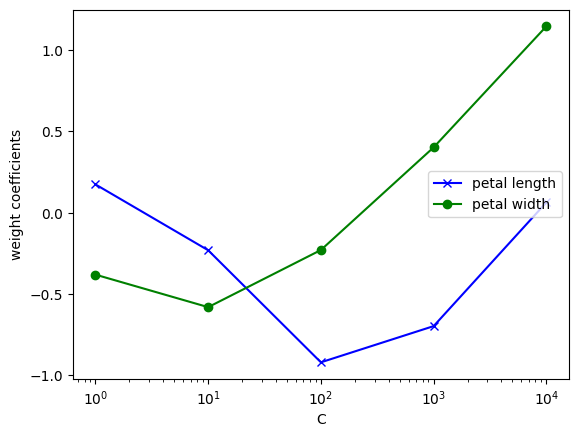

In [ ]:
import matplotlib.pyplot as plt

plt.plot(params, weights[:, 0], color='blue', marker='x', label='petal length')
plt.plot(params, weights[:, 1], color='green', marker='o', label='petal width')
plt.ylabel('weight coefficients')
plt.xlabel('C')

plt.legend(loc='right')
plt.xscale('log')

plt.show()